# Merging Clean Datasets

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# import all the df

rainfall = pd.read_csv("../01_exploratory_data_analysis/rainfall/dataset_rainfall.csv")
unemp = pd.read_csv("gdp_unemployment/gdppcap unemp and gini.csv")
protest = pd.read_csv("protests/yearly_protest_data.csv")

In [3]:
rainfall.columns

Index(['Unnamed: 0', 'ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'yearly_avg_rainfall', 'rainfall_var_t', 'rainfall_var_t_1',
       'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1', 'gdp_g',
       'rainfall_diff_from_mean_norm', 'n_below_rainfall', 'oil_prod',
       'agricultural', 'low_oil_high_agr', 'cum_rainfall_diff'],
      dtype='object')

In [4]:
rainfall = rainfall.drop('Unnamed: 0', axis=1)
rainfall = rainfall[['ISO3_code', 'Year', 'country', 
       'yearly_avg_rainfall', 'rainfall_var_t', 'rainfall_var_t_1',
       'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'ethnic_fractionation_index', 'gdp']]
rainfall.country.nunique()

138

In [5]:
unemp = unemp.drop (['Unnamed: 0', 'pop'], axis=1)
unemp.country.nunique()

191

In [6]:
protest = protest.drop('Unnamed: 0', axis = 1)
protest = protest.rename(columns= {'year':'Year'})
protest.country.nunique()

136

In [7]:
## Merge the two dataframes on column country and check for differences in country names
unemp_c= unemp[['country', 'ISO3_code']].copy()
rainfall_c= rainfall[['country', 'ISO3_code']].copy()

merged_df = pd.merge(unemp_c, rainfall_c, on='ISO3_code', suffixes=('_unemp', '_rain'))

# Check if values of column 'b' are equal in both dataframes
merged_df['b_equal'] = merged_df['country_unemp'] == merged_df['country_rain']
merged_df

,country_unemp,ISO3_code,country_rain,b_equal
0,Afghanistan,AFG,Afghanistan,True
1,Afghanistan,AFG,Afghanistan,True
2,Afghanistan,AFG,Afghanistan,True
3,Afghanistan,AFG,Afghanistan,True
4,Afghanistan,AFG,Afghanistan,True
...,...,...,...,...
569787,Zimbabwe,ZWE,Zimbabwe,True
569788,Zimbabwe,ZWE,Zimbabwe,True
569789,Zimbabwe,ZWE,Zimbabwe,True
569790,Zimbabwe,ZWE,Zimbabwe,True


In [8]:
merged_df[merged_df['b_equal']==False]['country_rain'].unique()

array(['Republic of Korea', 'United States of America'], dtype=object)

In [9]:
#USA and Korea are diff in rainfall and unemp - change to rainfall names
unemp.loc[unemp['country']=='United States', 'country']='United States of America'
unemp.loc[unemp['country']=='South Korea', 'country']= 'Republic of Korea'

#repeat step above to check
## Merge the two dataframes on column country and check for differences in country names
unemp_c= unemp[['country', 'ISO3_code']].copy()
rainfall_c= rainfall[['country', 'ISO3_code']].copy()

merged_df = pd.merge(unemp_c, rainfall_c, on='ISO3_code', suffixes=('_unemp', '_rain'))

# Check if values of column 'b' are equal in both dataframes
merged_df['b_equal'] = merged_df['country_unemp'] == merged_df['country_rain']
merged_df[merged_df['b_equal']==False]['country_rain'].unique()

array([], dtype=object)

In [10]:
# merging rainfall and gdp data - limited by the rainfall data
df = rainfall.merge(unemp, on= ['ISO3_code', 'Year', 'country'], how='inner')

In [11]:
df.country.nunique()

138

In [12]:
df.columns

Index(['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_percap', 'gdp_percap_pchange',
       'gdp_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange'],
      dtype='object')

In [13]:
df = df[['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange',  'unemp_rate', 'unemp_rate_pchange',
       'gini', 'gini_pchange']]



In [14]:
df= df.sort_values(by=['country', 'Year'])
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Lithuania', 'Madagascar', 'M

In [15]:
protest = protest.sort_values(by=['country', 'Year'])
protest.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia',
       'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi', 'M

In [16]:
fulldf = df.merge(protest, on = ['country', 'Year'], how='outer')
fulldf.columns

Index(['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange', 'population', 'participants', 'protest_fraction'],
      dtype='object')

In [17]:
fulldf.sample(10)

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
4215,JAM,2010,Jamaica,2228.805556,0.405743,-0.094388,243.027778,-0.017187,0.003834,5.268997,...,-1.457152,9654.0720,-1.872071,7.630,4.320481,0.415598,0.000000,2748568.0,100.0,0.000036
8145,TJK,2004,Tajikistan,668.760234,-0.123823,0.114468,36.112573,0.408427,-0.183937,19.222351,...,10.300002,1878.2870,8.156358,13.364,-2.814341,0.336020,2.696325,NaN,NaN,NaN
3754,HUN,1963,Hungary,504.337121,0.065356,0.176553,95.155303,0.003836,-0.126573,7.262480,...,5.700003,18242.0250,0.000000,3.419,0.000000,0.293258,0.000000,NaN,NaN,NaN
7273,SRB,2013,Serbia,620.454762,0.157555,0.277049,119.100000,-0.006100,0.048062,6.299652,...,0.451577,18366.6860,0.941381,22.154,-7.691667,0.394460,-1.107153,NaN,NaN,NaN
8957,URY,1981,Uruguay,1030.649254,-0.126391,0.482321,180.885572,-0.008981,0.038166,14.628029,...,1.559567,14106.5270,0.000000,6.307,0.000000,0.417775,0.000000,NaN,NaN,NaN
3742,HND,2015,Honduras,1453.567130,-0.049820,-0.130617,251.668981,0.015448,-0.001259,12.215979,...,3.840082,5812.5347,1.882016,6.147,-13.153433,0.492488,-1.256350,9237305.0,267650.0,0.028975
2588,SLV,1960,El Salvador,1765.388889,-0.208248,-0.208248,237.861111,-0.004671,-0.004671,43.005943,...,NaN,5960.0590,NaN,2.758,NaN,0.457511,NaN,NaN,NaN,NaN
1418,CAN,1990,Canada,390.654824,0.037347,-0.043982,-74.046194,-0.003985,0.164942,2.196213,...,0.202952,39863.0660,3.720690,5.280,0.000000,0.313654,1.137740,27691138.0,3750.0,0.000135
2936,FIN,1984,Finland,479.039103,-0.099002,0.161217,17.513462,0.321707,0.096838,7.245238,...,3.226529,34807.3320,0.000000,6.369,0.000000,0.268827,0.000000,NaN,NaN,NaN
3377,GTM,1979,Guatemala,2086.418803,0.146796,0.132952,229.756410,0.005386,-0.004764,25.381506,...,4.713448,7597.3696,0.000000,2.174,0.000000,0.532243,0.000000,NaN,NaN,NaN


In [18]:
fulldf.to_csv("merged_df.csv")

In [19]:
fulldf.head(15)

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
0,AFG,1960,Afghanistan,318.565807,-0.075064,-0.075064,116.206019,0.036755,0.036755,38.62789,...,NaN,1454.1108,NaN,7.908,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,1961,Afghanistan,294.653108,-0.075064,-0.075064,120.477183,0.036755,0.036755,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
2,AFG,1962,Afghanistan,243.503638,-0.173592,-0.075064,117.250992,-0.026778,0.036755,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
3,AFG,1963,Afghanistan,307.702050,0.263645,-0.173592,126.046296,0.075013,-0.026778,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
4,AFG,1964,Afghanistan,300.362434,-0.023853,0.263645,110.172619,-0.125935,0.075013,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
5,AFG,1965,Afghanistan,320.094246,0.065693,-0.023853,119.834656,0.087699,-0.125935,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
6,AFG,1966,Afghanistan,267.692460,-0.163707,0.065693,122.915344,0.025708,0.087699,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
7,AFG,1967,Afghanistan,330.657077,0.235213,-0.163707,117.043651,-0.047770,0.025708,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
8,AFG,1968,Afghanistan,315.201058,-0.046743,0.235213,117.498016,0.003882,-0.047770,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
9,AFG,1969,Afghanistan,331.842262,0.052796,-0.046743,113.670966,-0.032571,0.003882,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN


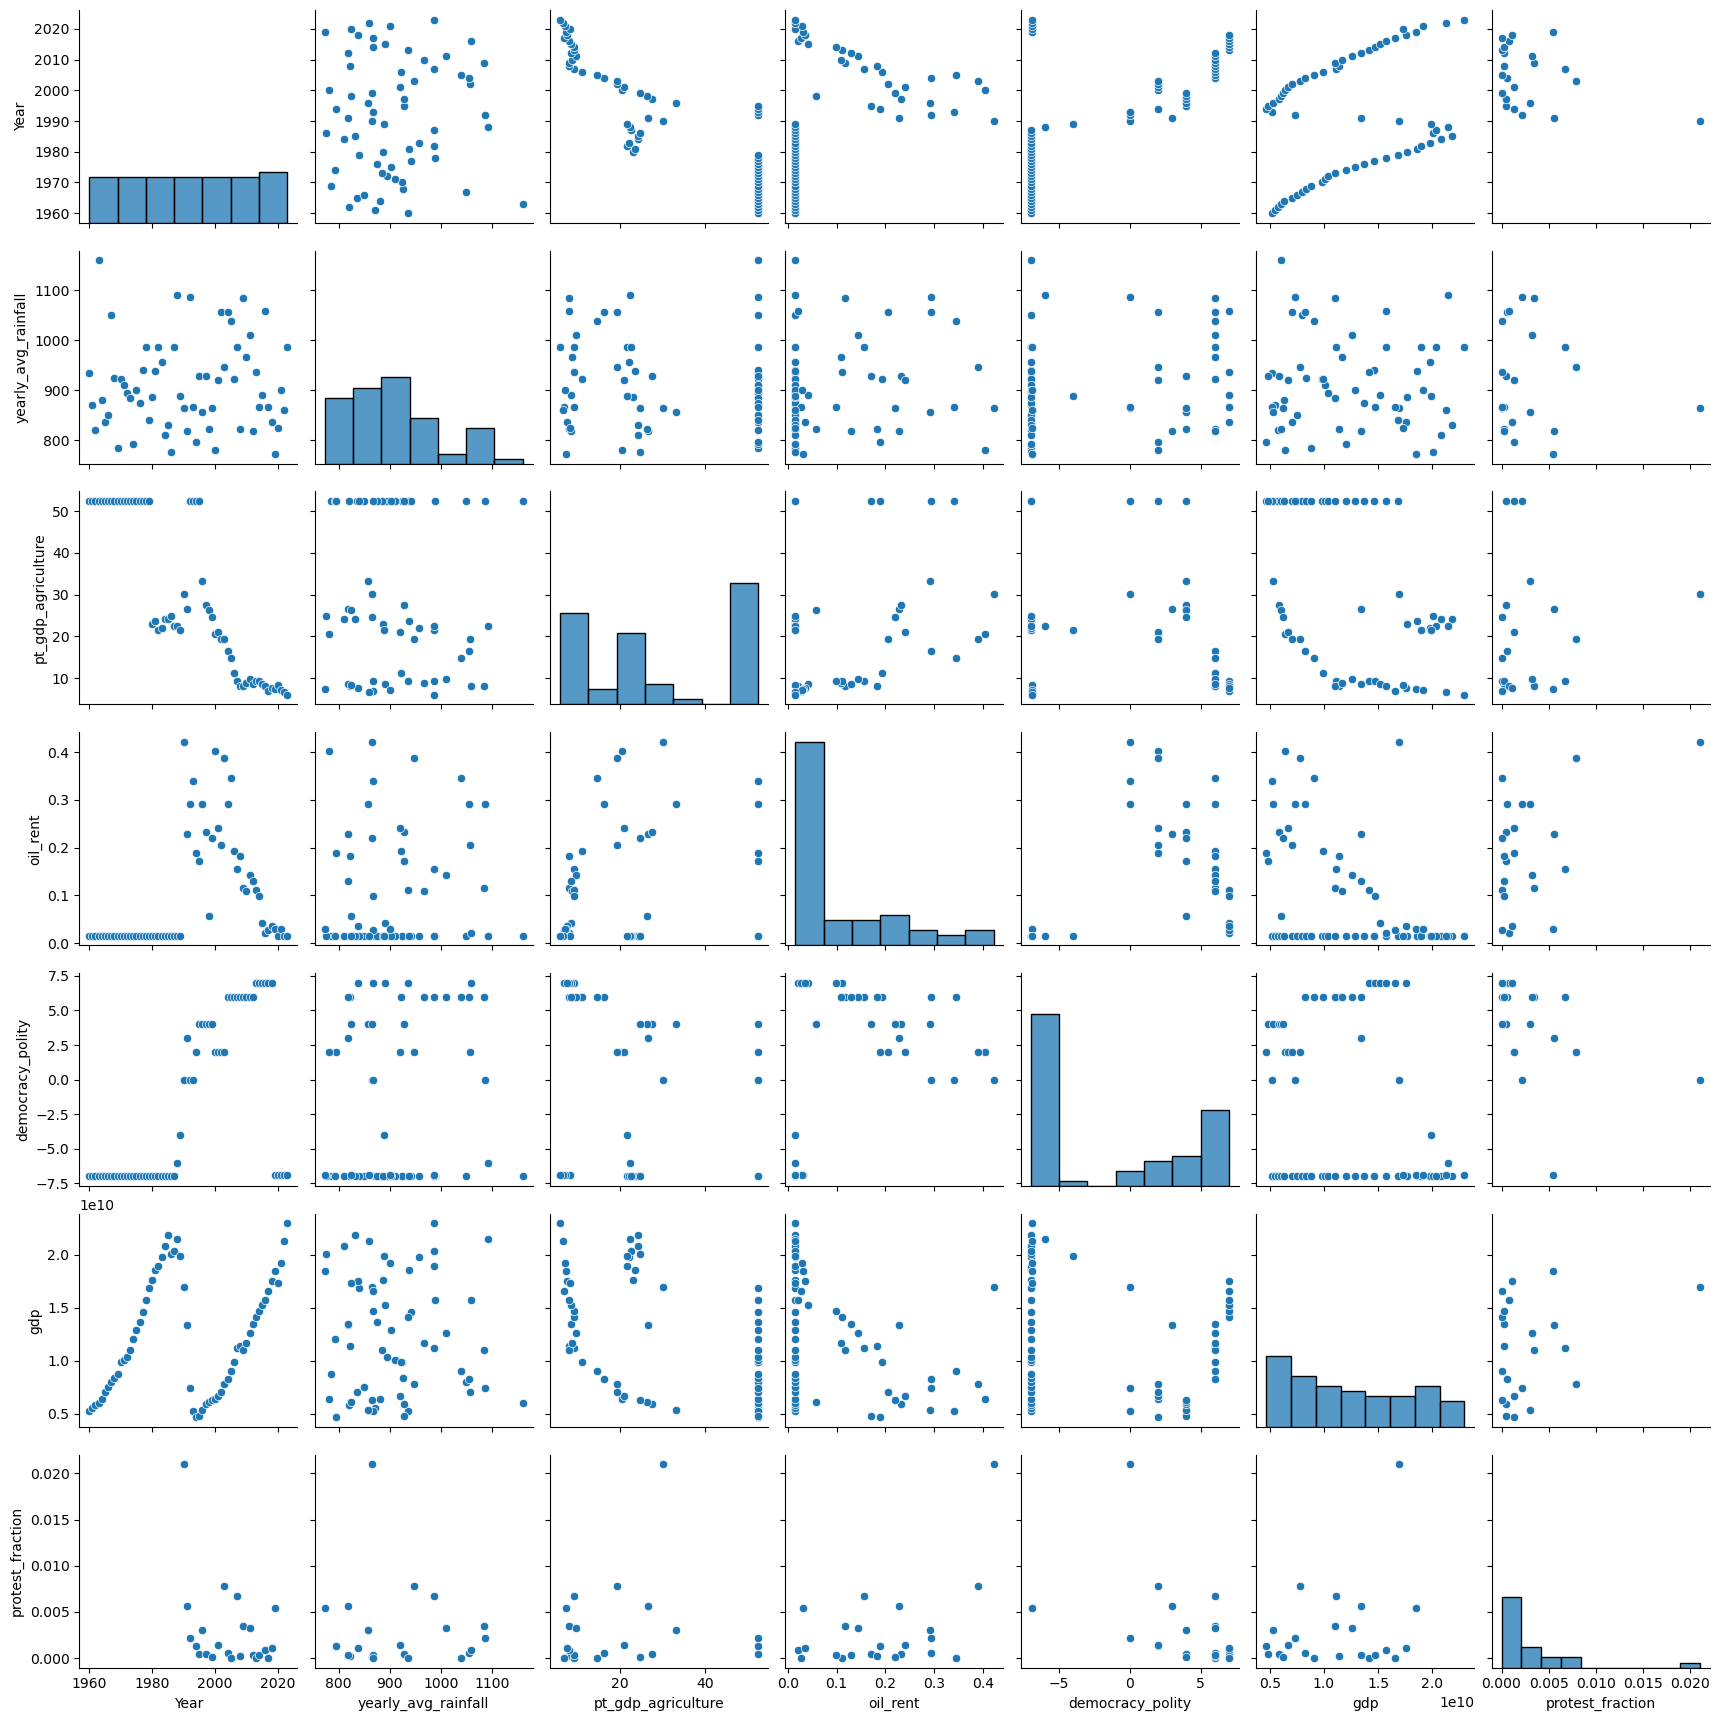

In [20]:
georgia = fulldf[fulldf['country'] == 'Georgia']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(georgia[feats])

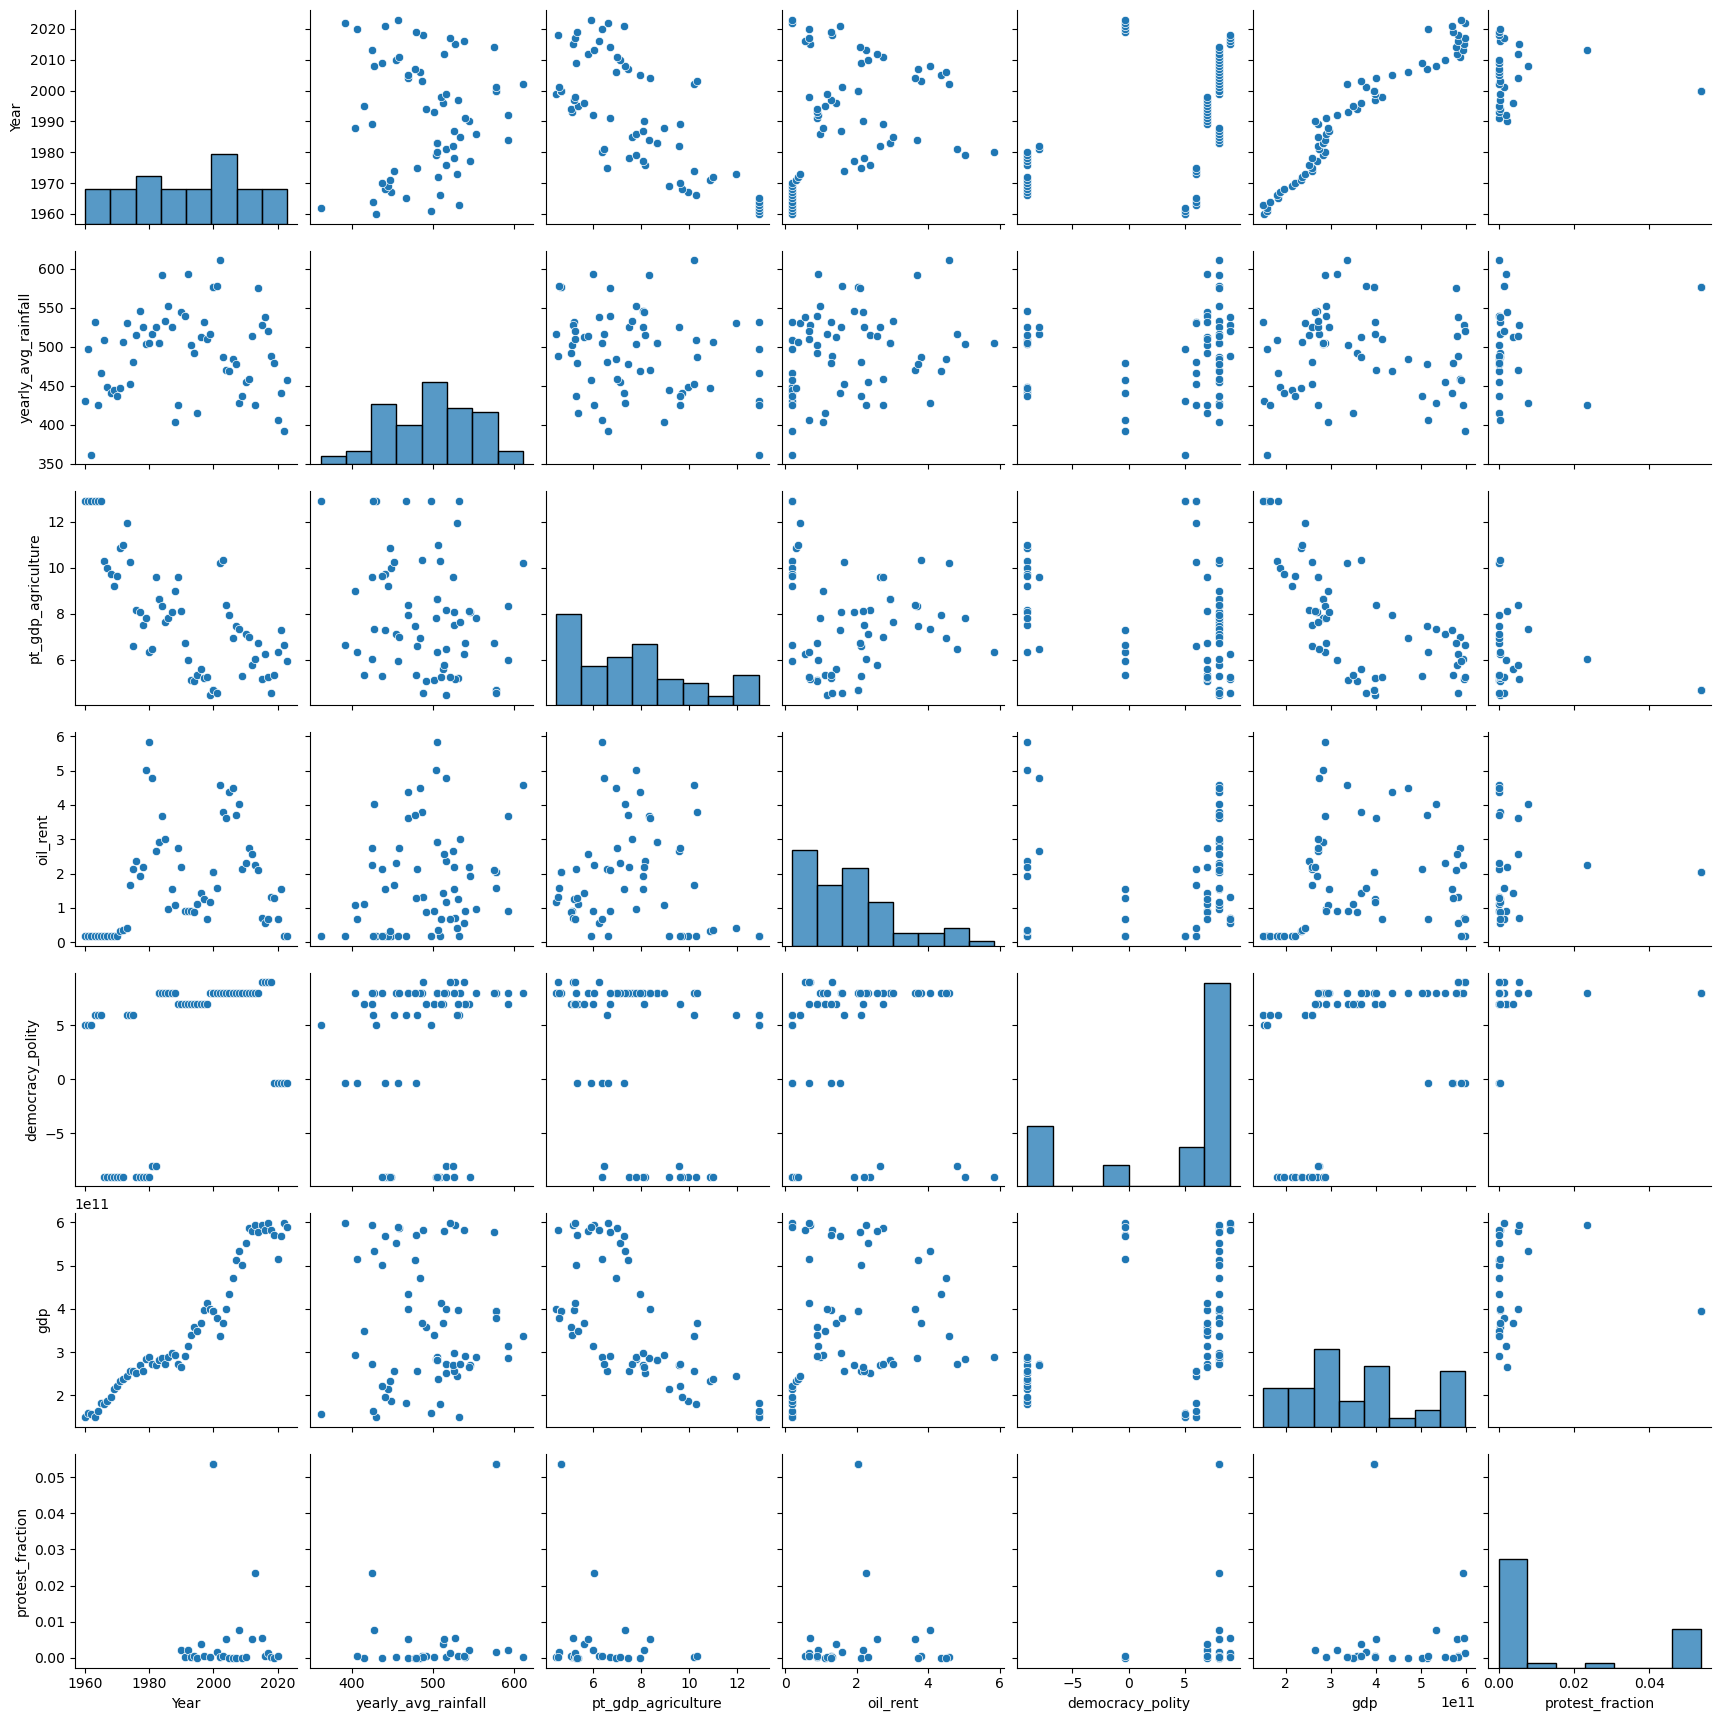

In [21]:
country = fulldf[fulldf['country'] == 'Argentina']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(country[feats])

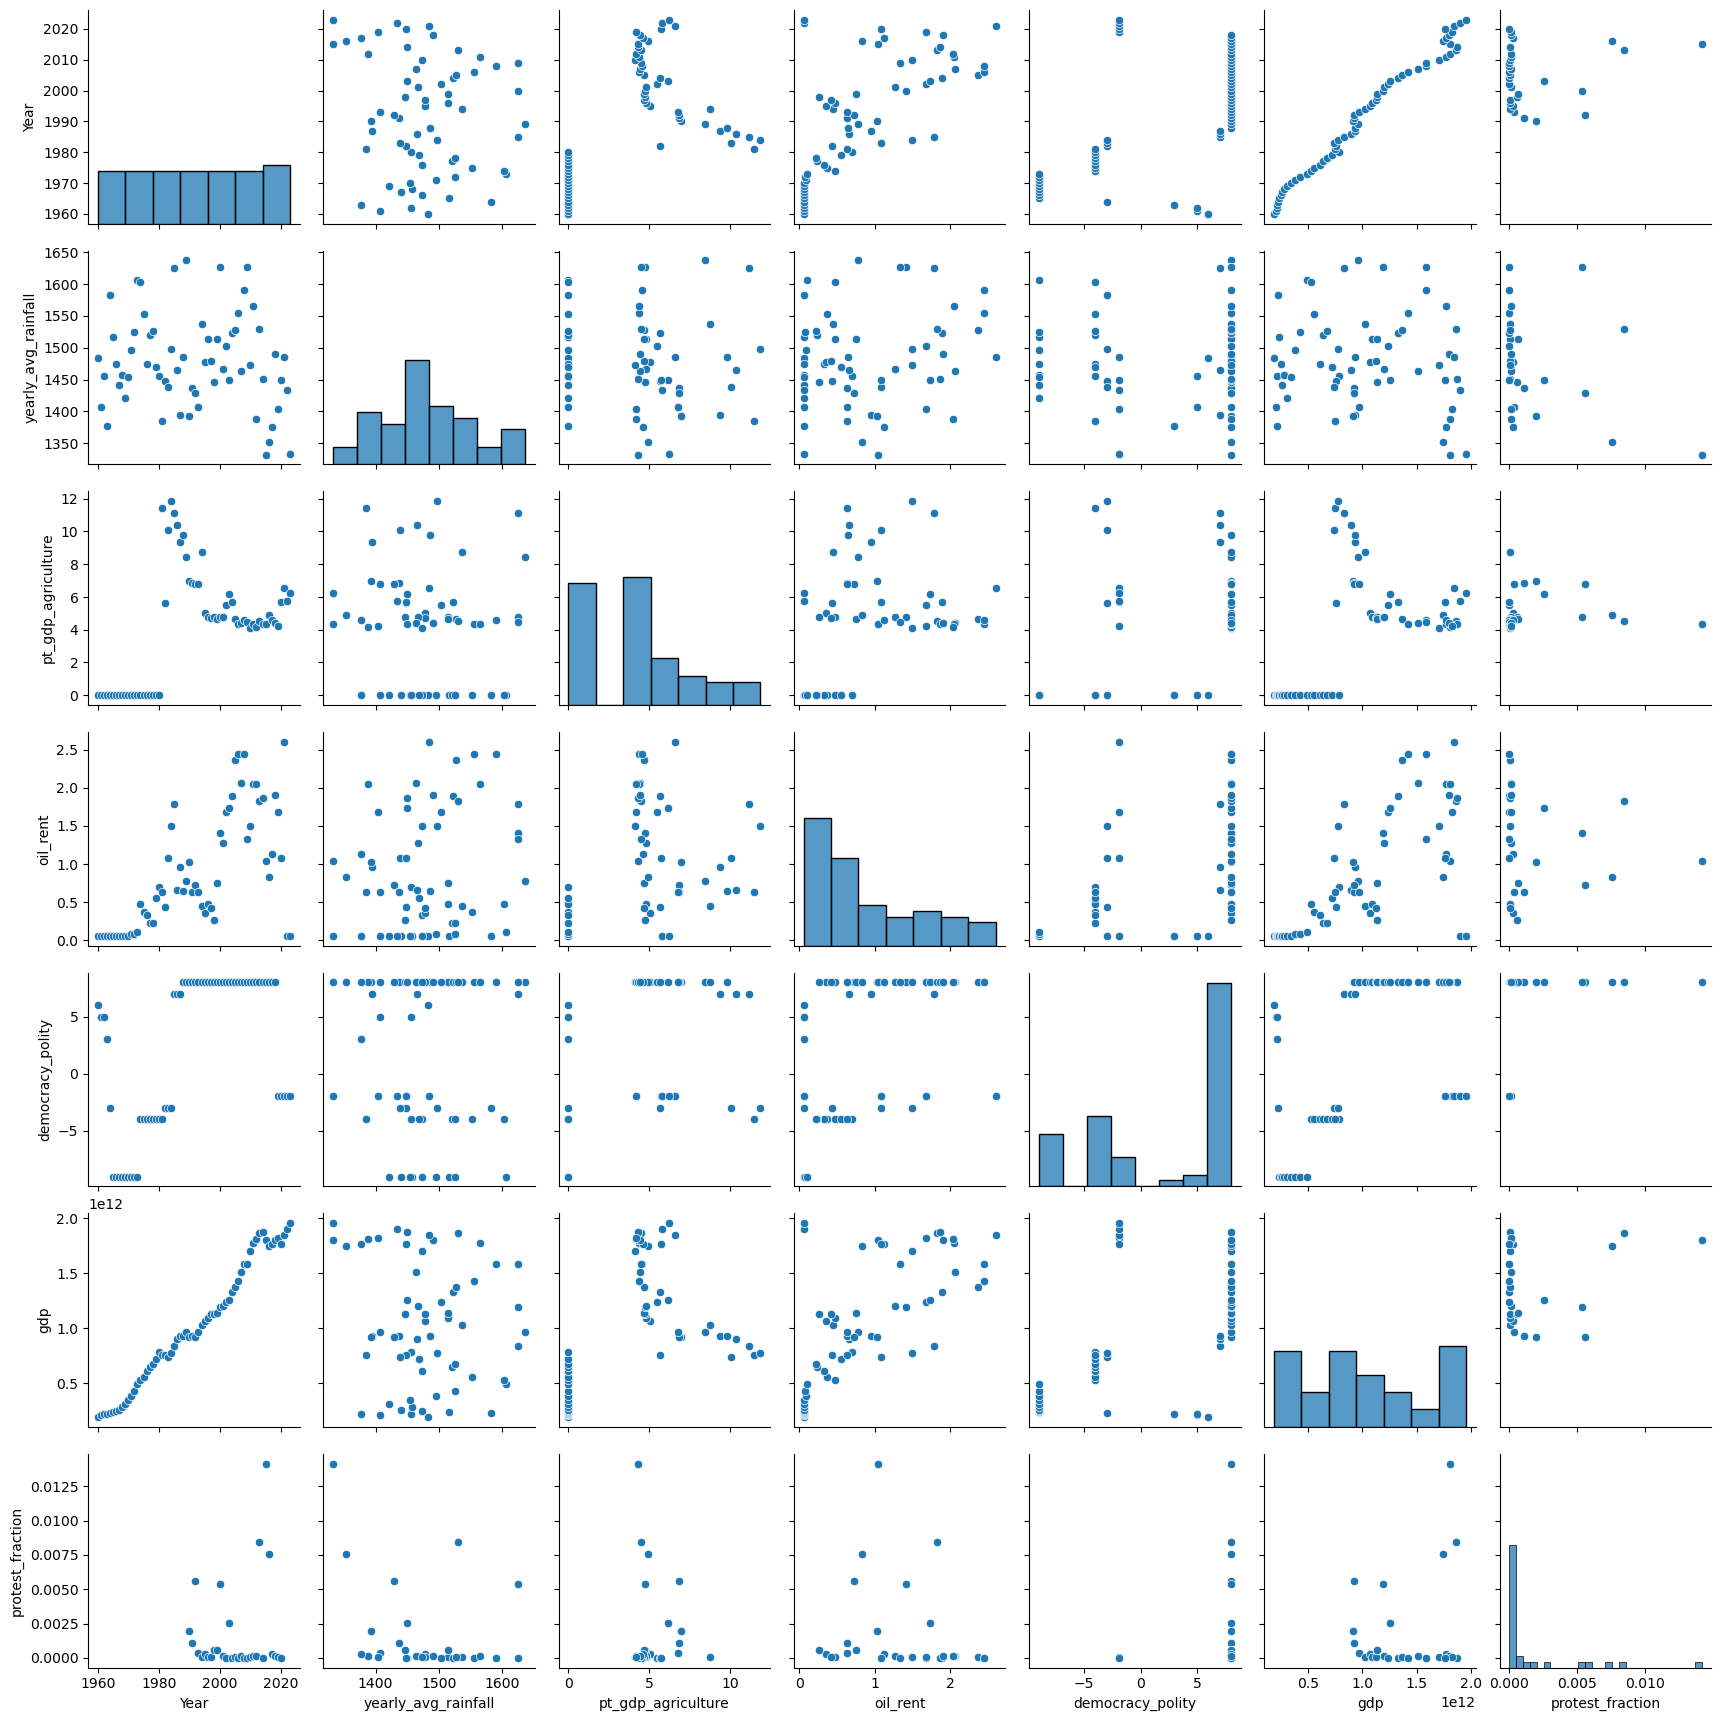

In [22]:
country = fulldf[fulldf['ISO3_code'] == 'BRA']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(country[feats])

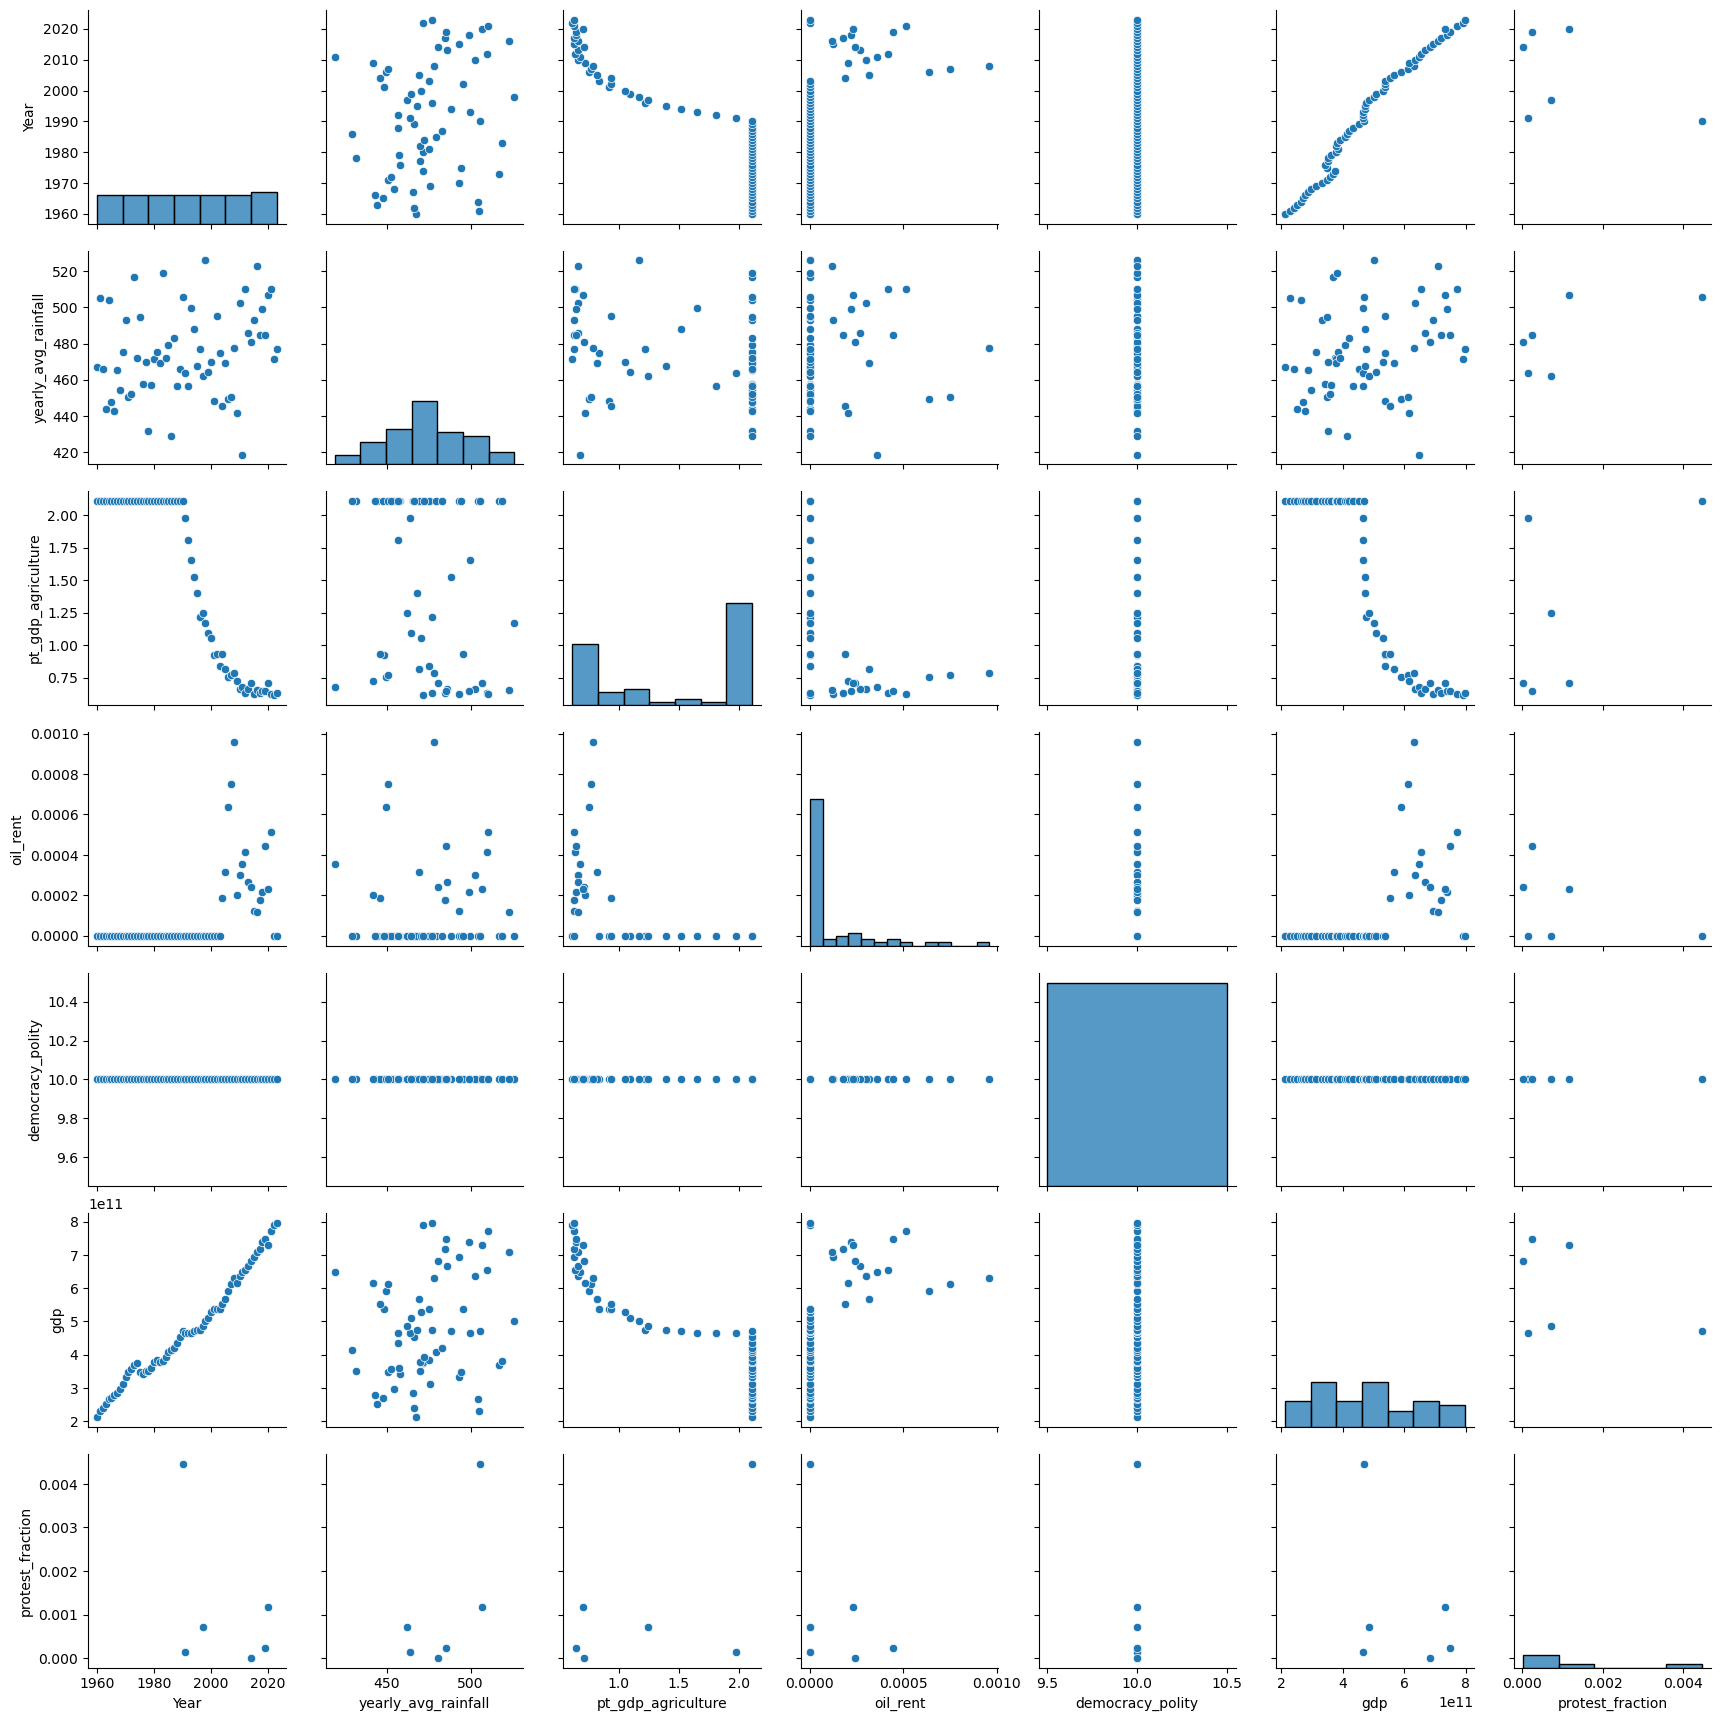

In [23]:
country = fulldf[fulldf['ISO3_code'] == 'CHE']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(country[feats])

In [24]:
fulldf[fulldf['ISO3_code'] == 'CHE']

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
7973,CHE,1960,Switzerland,467.327264,0.080628,0.080628,62.807833,0.039202,0.039202,2.109859,...,NaN,61837.77,NaN,1.818,NaN,0.330546,NaN,NaN,NaN,NaN
7974,CHE,1961,Switzerland,505.006702,0.080628,0.080628,65.269998,0.039202,0.039202,2.109859,...,8.108669,61837.77,0.000000,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7975,CHE,1962,Switzerland,466.214217,-0.076816,0.080628,62.333901,-0.044984,0.039202,2.109859,...,4.789946,61837.77,0.000000,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7976,CHE,1963,Switzerland,443.840975,-0.047989,-0.076816,65.085014,0.044135,-0.044984,2.109859,...,4.879198,61837.77,0.000000,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7977,CHE,1964,Switzerland,504.138918,0.135855,-0.047989,60.952078,-0.063501,0.044135,2.109859,...,5.256347,61837.77,0.000000,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8032,CHE,2019,Switzerland,484.999498,-0.028197,0.029430,75.876430,0.036670,-0.047245,0.647746,...,1.141978,80315.68,0.423089,4.394,-6.768513,0.339983,2.586823,8575280.0,2050.0,0.000239
8033,CHE,2020,Switzerland,506.837045,0.045026,-0.028197,75.511069,-0.004815,0.036670,0.705478,...,-2.141733,78023.34,-2.854162,4.817,9.626764,0.337379,-0.765955,8638167.0,10050.0,0.001163
8034,CHE,2021,Switzerland,510.413959,0.007057,0.045026,77.914134,0.031824,-0.004815,0.625932,...,5.391879,81603.21,4.588204,5.097,5.812747,0.330546,-2.025400,NaN,NaN,NaN
8035,CHE,2022,Switzerland,471.604969,-0.076034,0.007057,76.629072,-0.016493,0.031824,0.614575,...,2.568331,83007.28,1.720606,4.300,-15.636649,0.330546,0.000000,NaN,NaN,NaN


In [25]:
fulldf.columns

Index(['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange', 'population', 'participants', 'protest_fraction'],
      dtype='object')

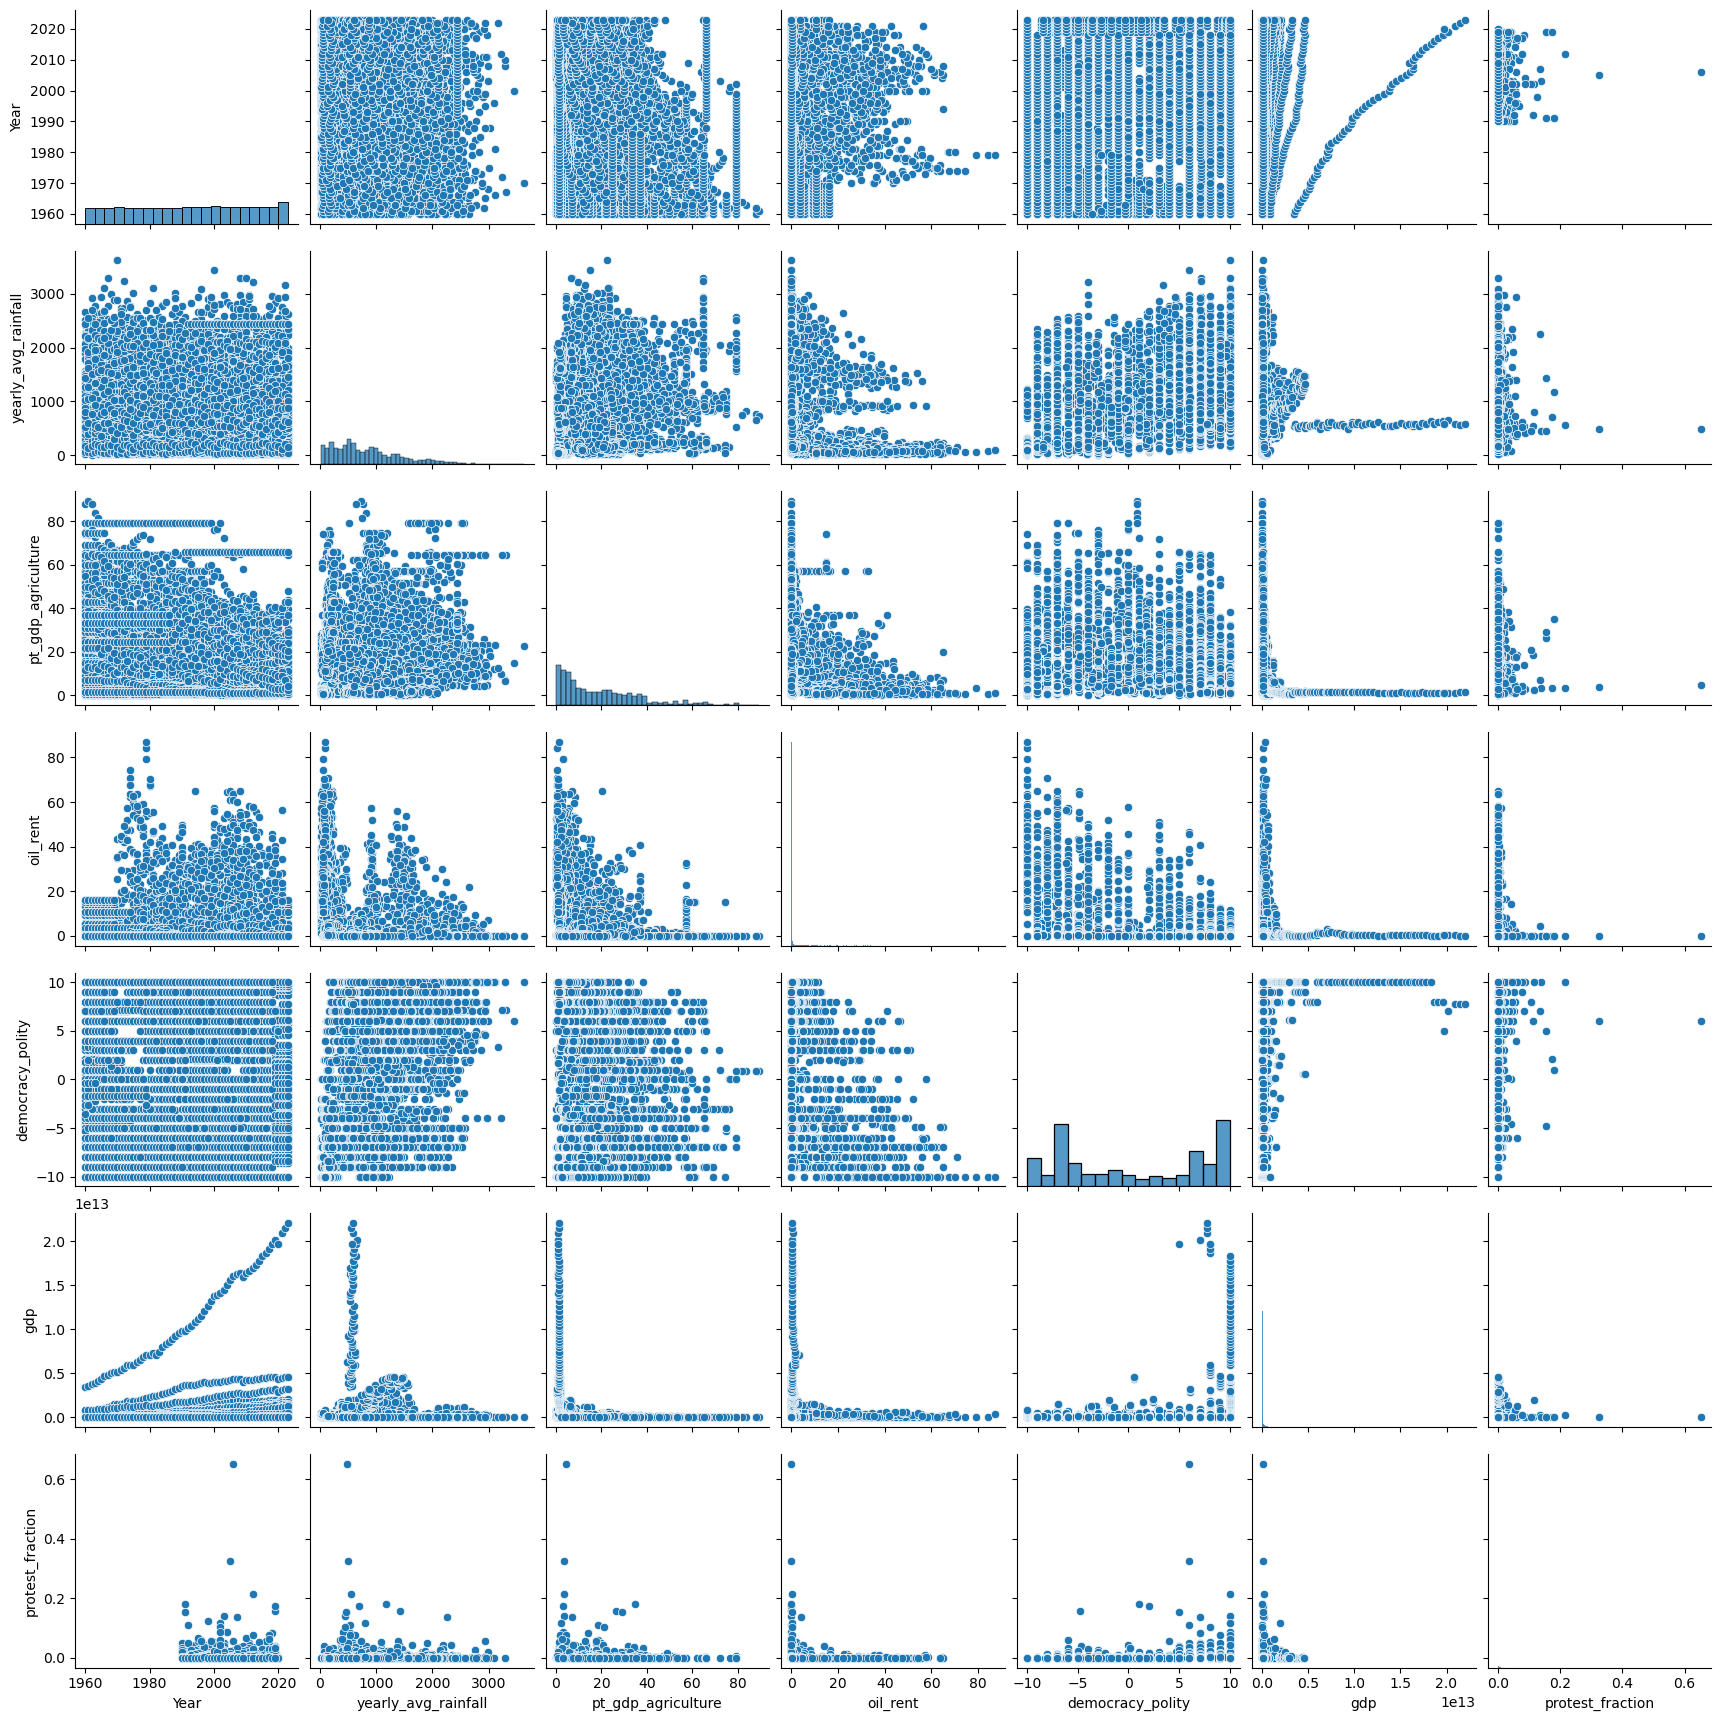

In [26]:
sns.pairplot(fulldf[['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']])